## Diversity on Recommender Systems

### Purpose

To present a computational model that can properly reproduce the behavior seen on cultural markets that rely on recommender systems to inform users about product availability. Get data on a cultural market (i.e. music streaming, youtube, movies, games books, etc.) and create an agent-based model that integrates machine learning algorithms to evaluate their effect on diversity.  
### Methodology
First, attempt to make a prototype model with users, recommender system (from now on: RS), and a set of products. Evaluate the simplest version of RS over the interaction of users and products. Follow the work on Fleder and Hosanagar (2009) and attempt to replicate their results.

## Stage 1 - Simple model with real data - Evaluate presence of basic RS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import re
import seaborn as sns
import time
from collections import Counter
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 11,8
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=14)  # fontsize of the figure title

In [3]:
def update_obj(df,id_,obj_):
    df[df.Object == id_] = obj_
    return df
    

In [4]:
#ABM Prototype
class market(object):
    def __init__(s,A_population,P_population):
        s.A,s.P = A_population,P_population
        
        #Create a list of agents. Then create a dataframe that contains the object and all parameters in other columns
        s.agente = [Agent(id_) for id_ in range(s.A)]
        s.agente_dict = {agent.id:[agent,agent.experience,agent.consumed] for agent in s.agente}
        s.A_df = pd.DataFrame.from_dict(s.agente_dict,orient='index')
        s.A_df.columns = ['Object','experience','consumed']
        
        #Do the same for Products.
        s.productum = [Product(id_) for id_ in range(s.P)]
        s.product_dict = {product.id:[product,product.value,product.rating,product.views] for product in s.productum}
        s.P_df = pd.DataFrame.from_dict(s.product_dict,orient='index')
        s.P_df.columns = ['Object','value','rating','views']
        
    def step(s):
        #Every step the market activates ALL agents, they evaluate a single product and report the feedback.
        #For now, products utility is their value. MEaning that final aggregated 'evaluations' should be a gauss distro.
        for a in s.agente:
            #Activation
            if a.activation > rd.random():
                target_p = a.search(s.P)
                a.consume(s,target_p,s.productum[target_p].value)
                #Update agents info
                s.A_df = update_obj(s.A_df,a.id,a)
        
class Agent(object):
    def __init__(s,id_):
        s.id = id_
        s.activation = 1
        s.experience = {}
        s.consumed = []
        
    def search(s,pop):
        #Random
        return rd.randint(0,pop-1)
        
    def consume(s,market,movie_id,movie_value):
        s.utility = movie_value
        s.experience[movie_id] = s.utility
        market.A_df.loc[s.id,'experience'] = s.utility
        
        s.consumed.append(movie_id)
        market.A_df.loc[s.id,'consumed'] = s.consumed
        
        market.P_df.loc[movie_id,'rating'] += s.utility
        market.P_df.loc[movie_id,'views'] += 1
    
class Product(object):
    def __init__(s,id_):
        s.id = id_
        s.value = rd.gauss(0,1)
        s.rating = 0
        s.views = 0
        

In [5]:
M.A_df.loc[1,'experience']

NameError: name 'M' is not defined

In [14]:
t0 = time.clock()
M = market(100,100)
t1 = time.clock()
for i in range(5000):
    M.step()
t2 = time.clock()
print('Initialization: '+str(t1-t0)+' secs. Total: '+str(t2-t1)+' secs.')

C:\Users\ELhuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\ELhuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


Initialization: 0.019064300000081857 secs. Total: 2585.1684052 secs.


C:\Users\ELhuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [10]:
t0

350.8157932

In [13]:
sum(list(M.P_df.views))

10000

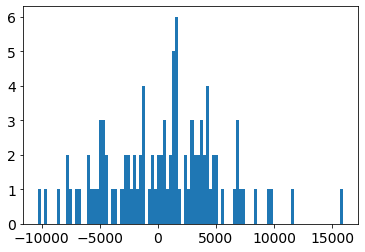

In [15]:
plt.hist(list(M.P_df.rating),bins=100)
plt.show()

### Data Exploration

I'm using the 'The Movies Dataset' (available at: https://www.kaggle.com/rounakbanik/the-movies-dataset).
Over 45,000 movies. 26 million ratings. Over 270.000 users.
Dataset contains: movie metadata, movie credits, keywords, and ratings.
Alternative small version with 9,000 movies.

In [61]:
moviedf = pd.DataFrame.from_csv('MoviesDataset/movies_metadata.csv') 

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [62]:
moviedf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [160]:
#Create a simple df with fundamental attributes: id, title, vote_count, vote_average, budget, popularity, genre
#Consider these for later: revenue, runtime, spoken_language, original_language, adult
df = moviedf[['id','title','vote_count','vote_average','popularity','budget','genres','imdb_id','release_date']]
df.index = df.id

popularityfix = []
for p in df.popularity:
    try:
        popularityfix.append(float(p))
    except:
        popularityfix.append(-0.1)
df.popularity = popularityfix

In [161]:
df.head()

,id,title,vote_count,vote_average,popularity,budget,genres,imdb_id,release_date
id,,,,,,,,,
862,862,Toy Story,5415.0,7.7,21.946943,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,1995-10-30
8844,8844,Jumanji,2413.0,6.9,17.015539,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,1995-12-15
15602,15602,Grumpier Old Men,92.0,6.5,11.712900,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,1995-12-22
31357,31357,Waiting to Exhale,34.0,6.1,3.859495,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,1995-12-22
11862,11862,Father of the Bride Part II,173.0,5.7,8.387519,0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,1995-02-10


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Error
Ignored
Ignored
Ignored


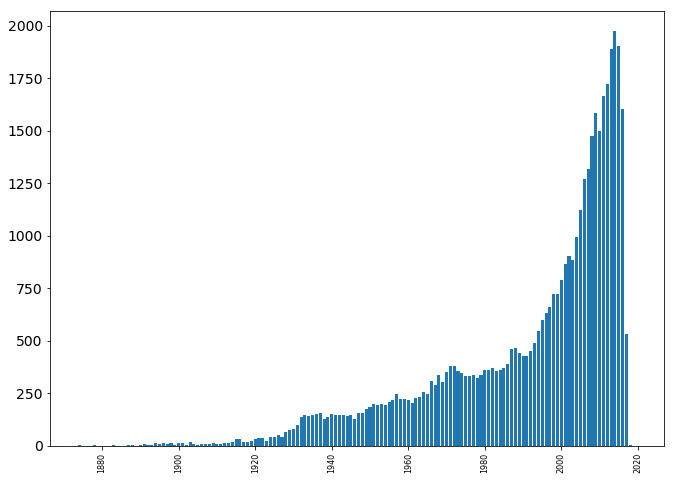

In [162]:
years = [re.split('-',str(i))[0] for i in list(df.release_date)]
ty = []
for y in years:
    try:
        ty.append(int(y))
    except:
        ty.append(0)
df['year'] = ty
countyrs = Counter(years)
years = []
for i in countyrs.keys():
    try:
        if int(i) > 1800:
            years.append(int(i))
        else:
            print('Ignored')
    except:
        print('Error')
minyr,maxyr = min(years),max(years)


plt.bar(range(minyr,maxyr),[countyrs[str(i)] for i in range(minyr,maxyr)])
plt.xticks(size=8,rotation=90)
plt.show()

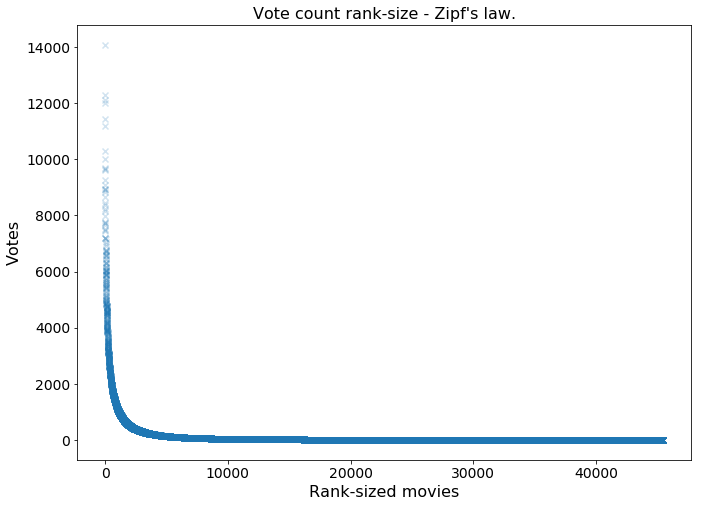

In [163]:
df = df.sort_values(by='vote_count',ascending=False)
plt.scatter(range(len(list(df.vote_count))),list(df.vote_count),alpha=0.2,marker='x')
plt.title('Vote count rank-size - Zipf\'s law.')
plt.xlabel('Rank-sized movies')
plt.ylabel('Votes')
plt.show()

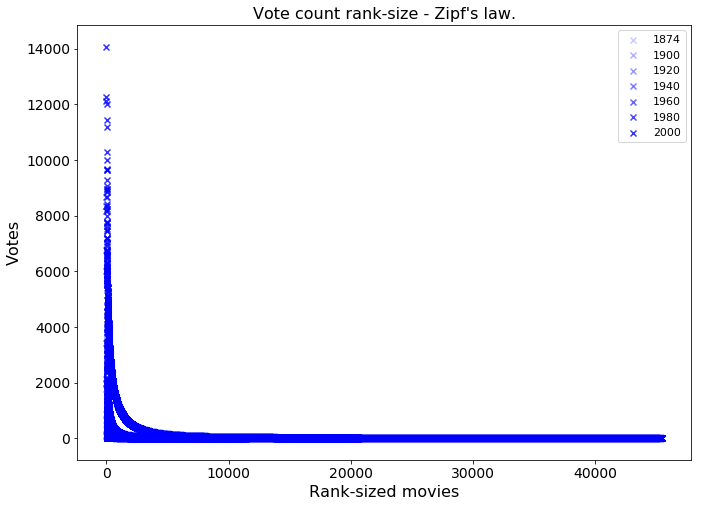

In [164]:
#Now, lets look at movies by two decades

intervals = [minyr,1900,1920,1940,1960,1980,2000,2020]
alphas = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by='vote_count',ascending=False)
    plt.scatter(range(len(list(tdf.vote_count))),list(tdf.vote_count),alpha=alphas[s],c='b',marker='x',label=str(intervals[s]))

plt.title('Vote count rank-size - Zipf\'s law.')
plt.legend()
plt.xlabel('Rank-sized movies')
plt.ylabel('Votes')
plt.show()

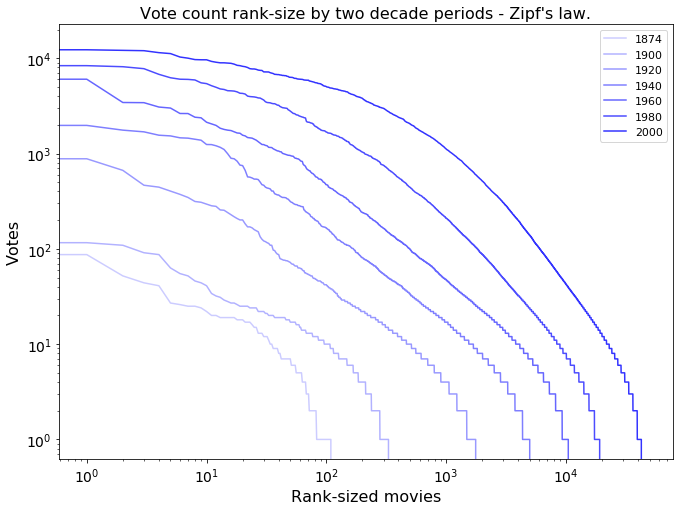

In [165]:
intervals = [minyr,1900,1920,1940,1960,1980,2000,2020]
alphas = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by='vote_count',ascending=False)
    plt.loglog(list(tdf.vote_count),c='b',label=str(intervals[s]),alpha=alphas[s])

plt.title('Vote count rank-size by two decade periods - Zipf\'s law.')
plt.legend()
plt.xlabel('Rank-sized movies')
plt.ylabel('Votes')
plt.show()

In [166]:
tdf.head()

,id,title,vote_count,vote_average,popularity,budget,genres,imdb_id,release_date,year
id,,,,,,,,,,
27205,27205,Inception,14075.0,8.1,29.108149,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1375666,2010-07-14,2010
155,155,The Dark Knight,12269.0,8.3,123.167259,185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",tt0468569,2008-07-16,2008
19995,19995,Avatar,12114.0,7.2,185.070892,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0499549,2009-12-10,2009
24428,24428,The Avengers,12000.0,7.4,89.887648,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",tt0848228,2012-04-25,2012
293660,293660,Deadpool,11444.0,7.4,187.860492,58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt1431045,2016-02-09,2016


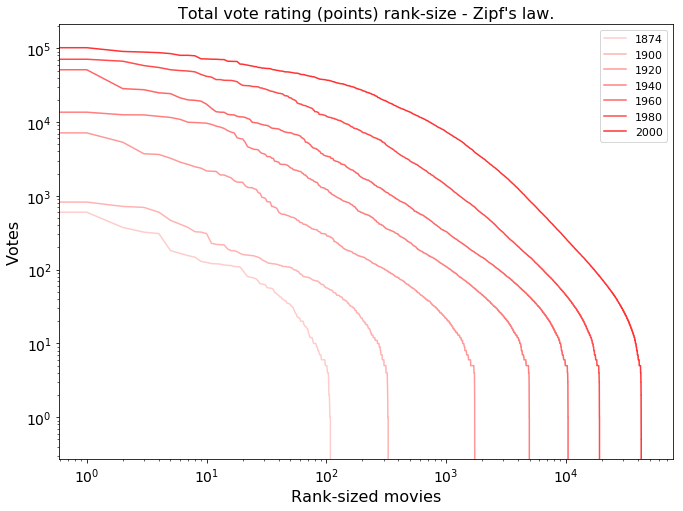

In [167]:
#What about total vote points?

df['total_vote_points'] = df.vote_average * df.vote_count

intervals = [minyr,1900,1920,1940,1960,1980,2000,2020]
alphas = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by = 'total_vote_points', ascending = False)
    plt.loglog(list(tdf.total_vote_points),c='r',label=str(intervals[s]),alpha=alphas[s])

plt.title('Total vote rating (points) rank-size - Zipf\'s law.')
plt.legend()
plt.xlabel('Rank-sized movies')
plt.ylabel('Votes')
plt.show()

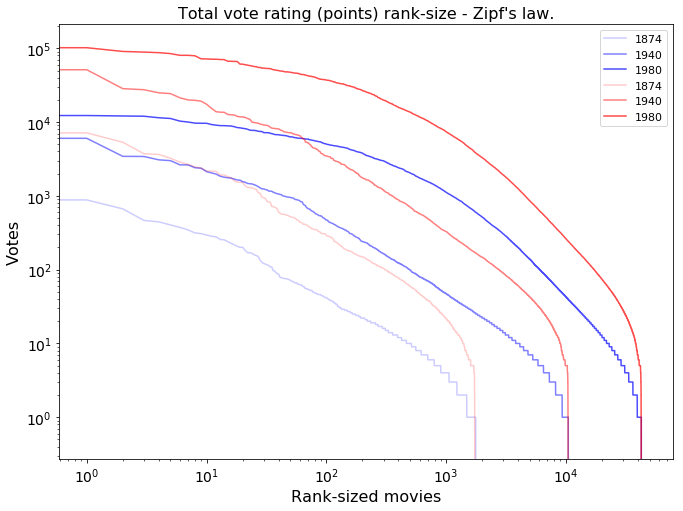

In [168]:
#Plot both with less intervals

intervals = [minyr,1940,1980,2020]
alphas = [0.2,0.5,0.7,0.9]

for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by='vote_count',ascending=False)
    plt.loglog(list(tdf.vote_count),c='b',label=str(intervals[s]),alpha=alphas[s])

for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by = 'total_vote_points', ascending = False)
    plt.loglog(list(tdf.total_vote_points),c='r',label=str(intervals[s]),alpha=alphas[s])

plt.title('Total vote rating (points) rank-size - Zipf\'s law.')
plt.legend()
plt.xlabel('Rank-sized movies')
plt.ylabel('Votes')
plt.show()

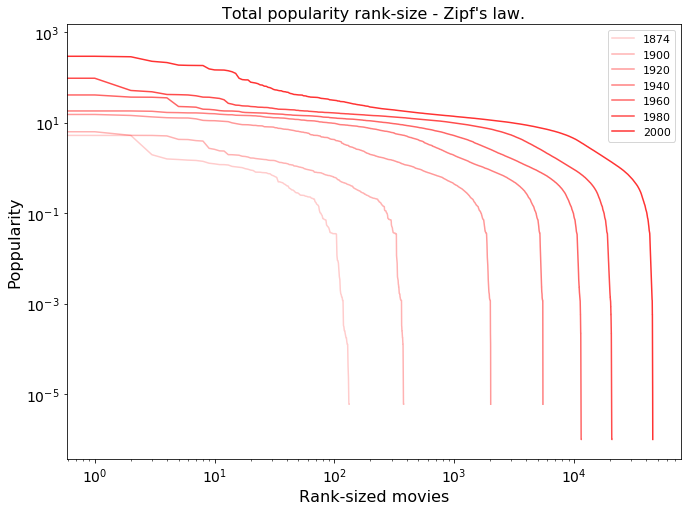

In [170]:
#What about popularity?

intervals = [minyr,1900,1920,1940,1960,1980,2000,2020]
alphas = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in range(len(intervals)-1):
    s,f = i,i+1
    tyears = [i for i in range(intervals[s],intervals[f])]
    tdf = df[df.year < max(tyears)]
    tdf = tdf.sort_values(by ='popularity', ascending = False)
    tdf = tdf[tdf.popularity > 0]
    plt.loglog(list(tdf.popularity),c='r',label=str(intervals[s]),alpha=alphas[s])

plt.title('Total popularity rank-size - Zipf\'s law.')
plt.legend()
plt.xlabel('Rank-sized movies')
plt.ylabel('Poppularity')
plt.show()

In [173]:
df.popularity.describe()


count    45461.000000
mean         2.921412
std          6.005365
min         -0.100000
25%          0.385938
50%          1.127613
75%          3.678782
max        547.488298
Name: popularity, dtype: float64

In [ ]:
|